In [1]:
import numpy as np
import cv2
import os
import IPython

cali_folder = "Images_cali/"
if not os.path.exists(cali_folder):
    os.makedirs(cali_folder)

In [2]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = os.listdir("Images/")
images.sort()
print(images)

['0000.jpg', '0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg', '0006.jpg', '0007.jpg', '0008.jpg', '0009.jpg', '0010.jpg', '0011.jpg', '0012.jpg', '0013.jpg', '0014.jpg', '0015.jpg', '0016.jpg', '0017.jpg', '0018.jpg', '0019.jpg', '0020.jpg', '0021.jpg', '0022.jpg', '0023.jpg', '0024.jpg', '0025.jpg', '0026.jpg', '0027.jpg', '0028.jpg', '0029.jpg', '0030.jpg', '0031.jpg', '0032.jpg', '0033.jpg', '0034.jpg', '0035.jpg', '0036.jpg', '0037.jpg', '0038.jpg', '0039.jpg', '0040.jpg', '0041.jpg', '0042.jpg', '0043.jpg', '0044.jpg', '0045.jpg', '0046.jpg', '0047.jpg', '0048.jpg', '0049.jpg', '0050.jpg', '0051.jpg', '0052.jpg', '0053.jpg', '0054.jpg', '0055.jpg', '0056.jpg', '0057.jpg', '0058.jpg', '0059.jpg', '0060.jpg', '0061.jpg', '0062.jpg', '0063.jpg', '0064.jpg', '0065.jpg', '0066.jpg', '0067.jpg', '0068.jpg', '0069.jpg', '0070.jpg', '0071.jpg', '0072.jpg', '0073.jpg', '0074.jpg', '0075.jpg', '0076.jpg', '0077.jpg', '0078.jpg', '0079.jpg', '0080.jpg', '0081.jpg', '0082.jpg', '00

In [3]:
def show_image(image):
    _,ret = cv2.imencode('.jpg', image) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

0051.jpgfound chessboard


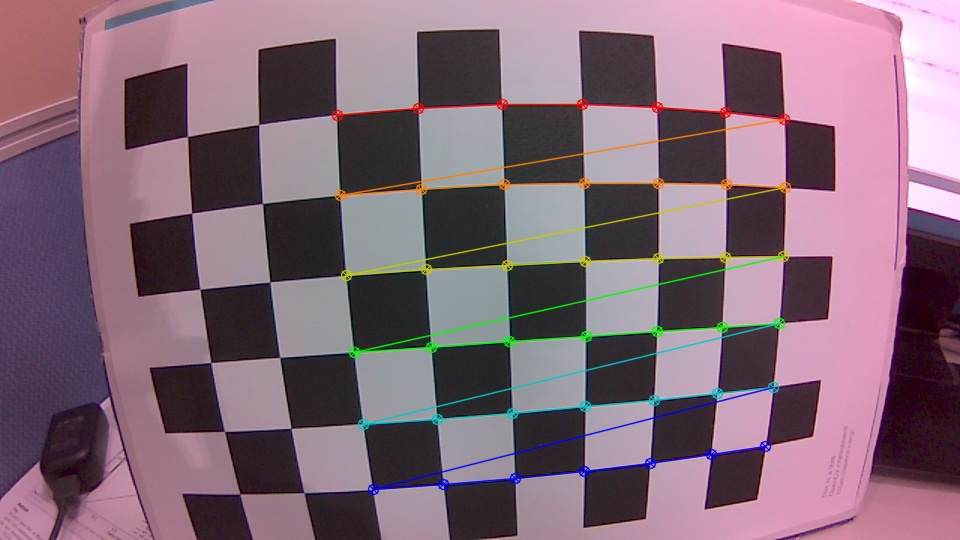

0052.jpgfound chessboard


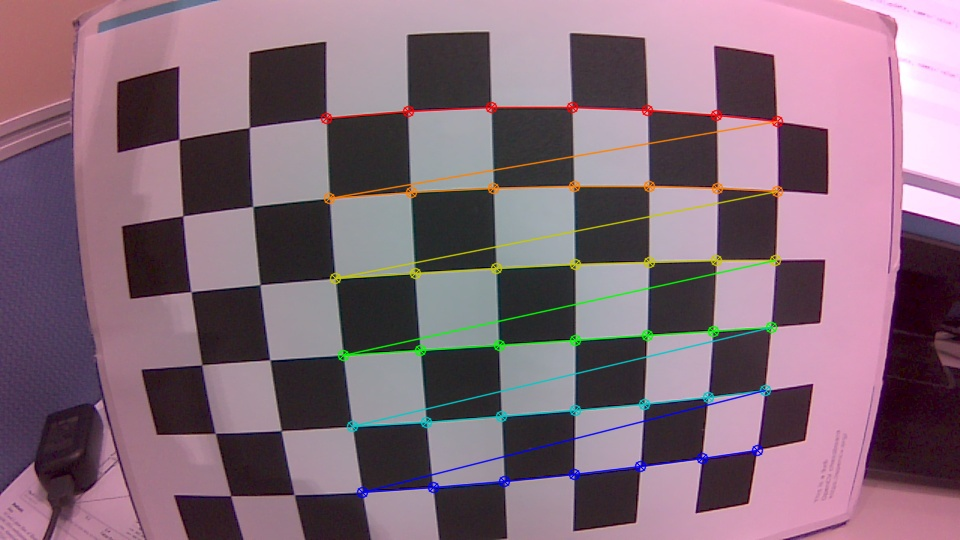

0053.jpgfound chessboard


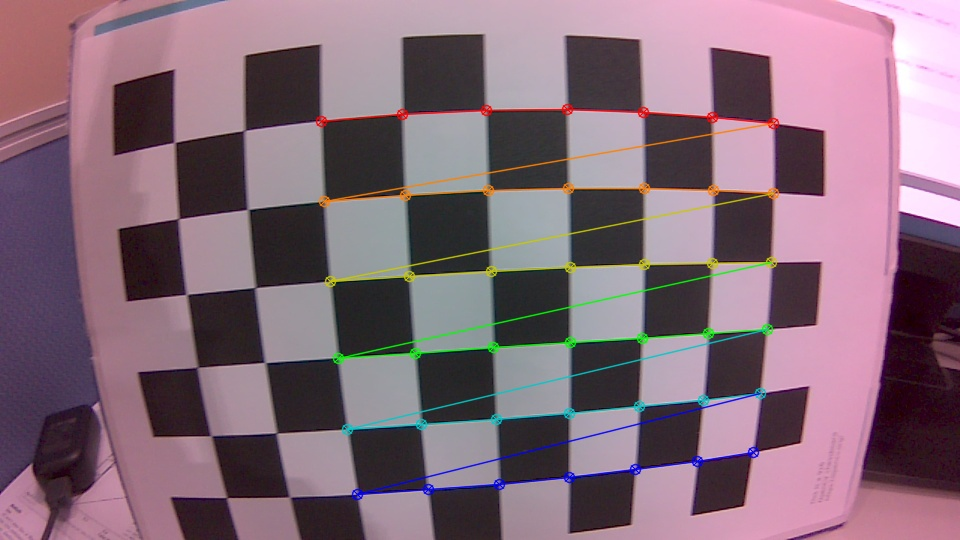

0054.jpgfound chessboard


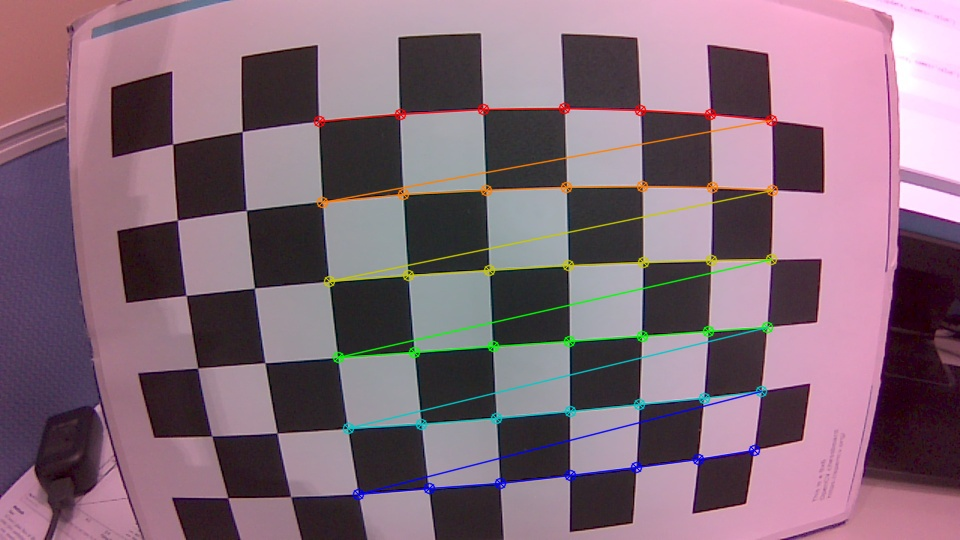

0058.jpgfound chessboard


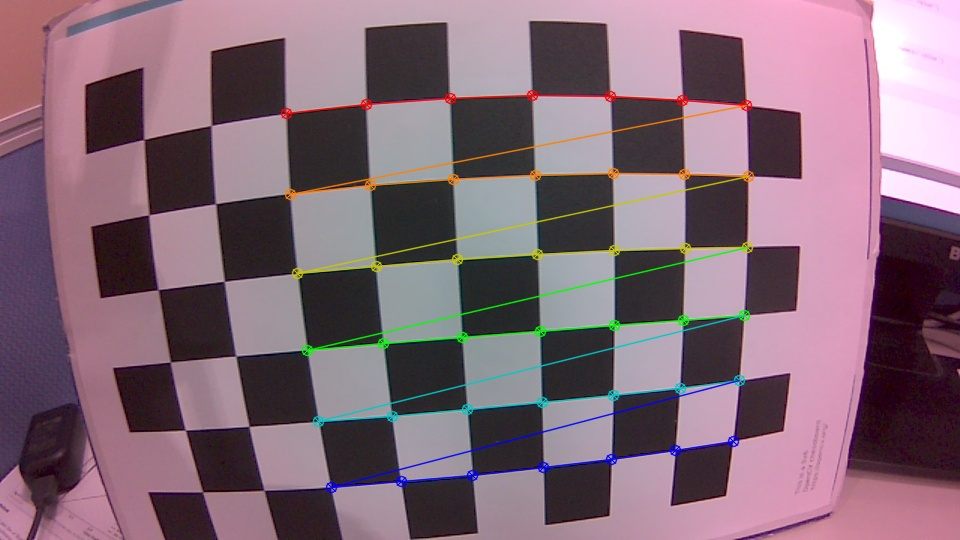

0059.jpgfound chessboard


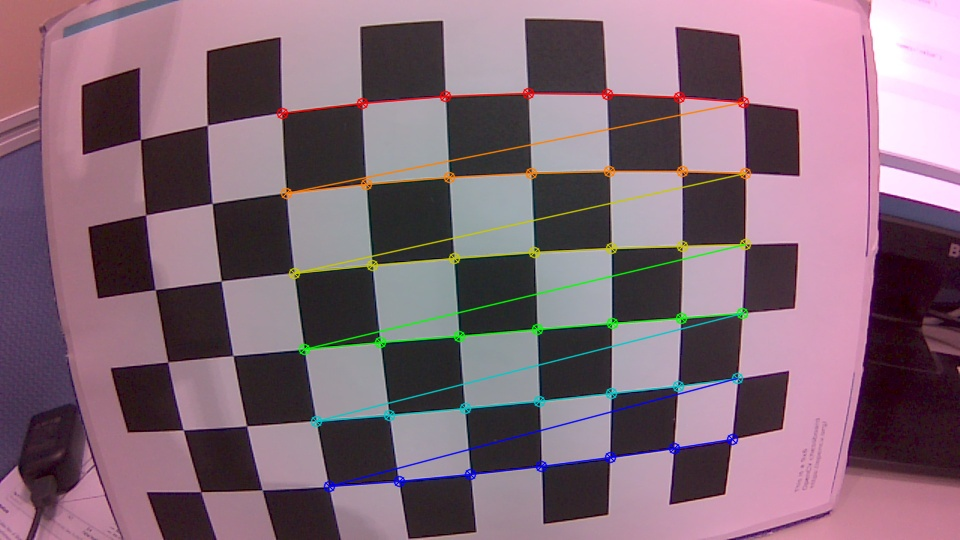

0060.jpgfound chessboard


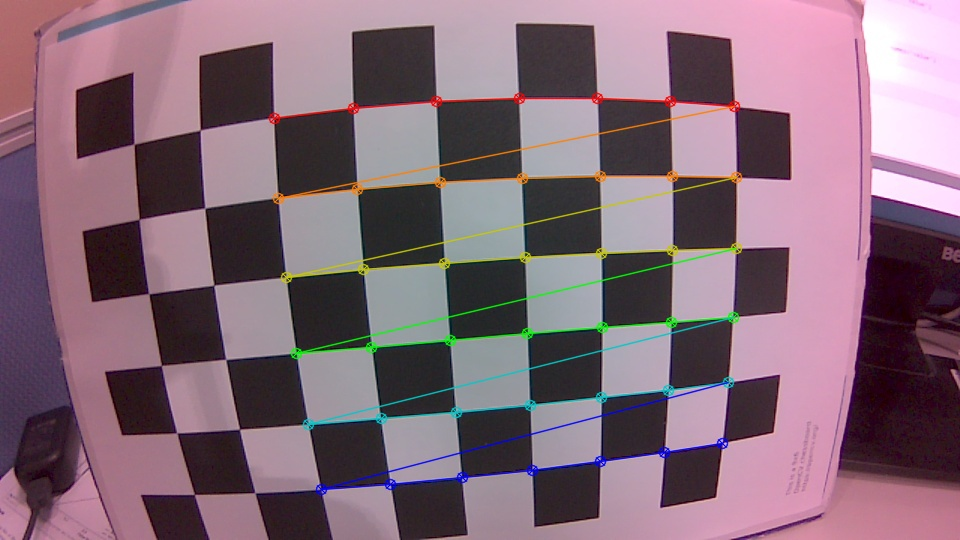

0062.jpgfound chessboard


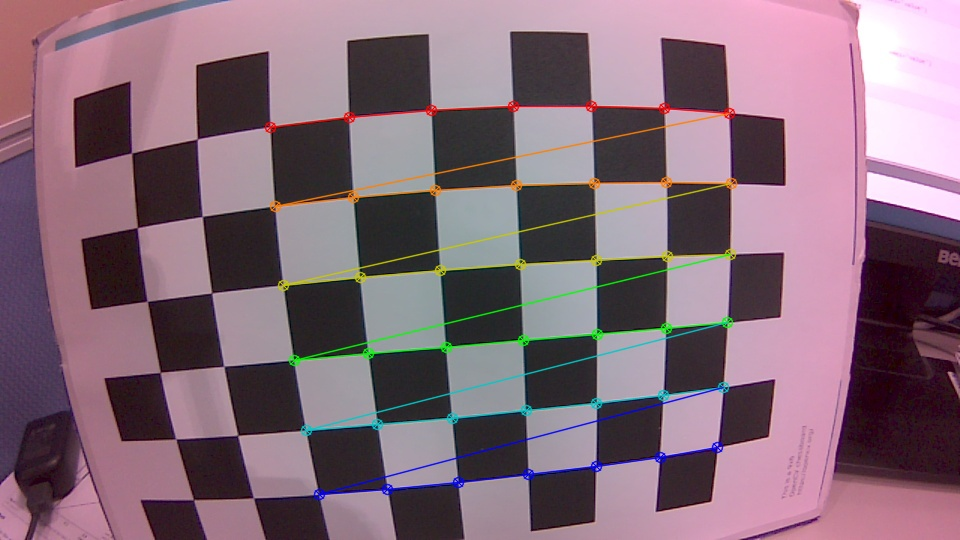

0063.jpgfound chessboard


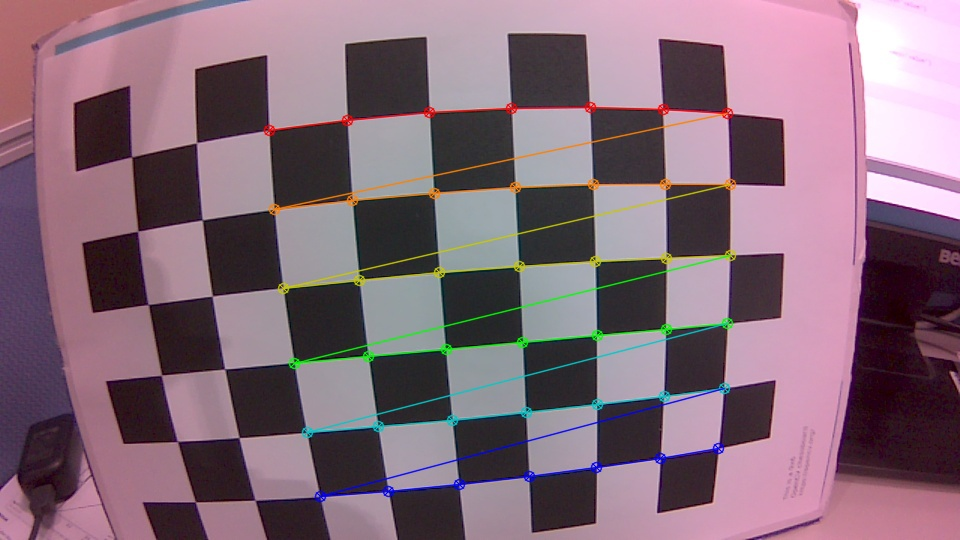

0064.jpgfound chessboard


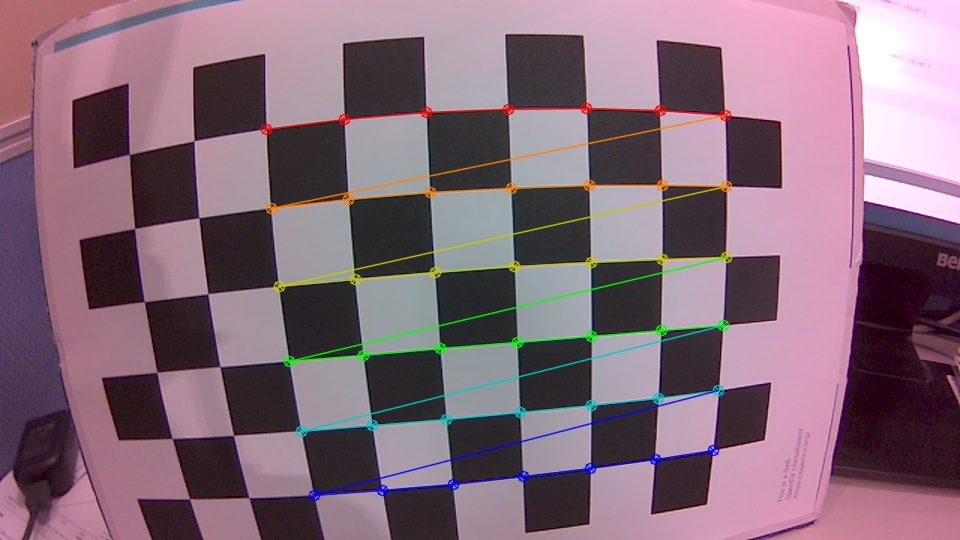

0065.jpgfound chessboard


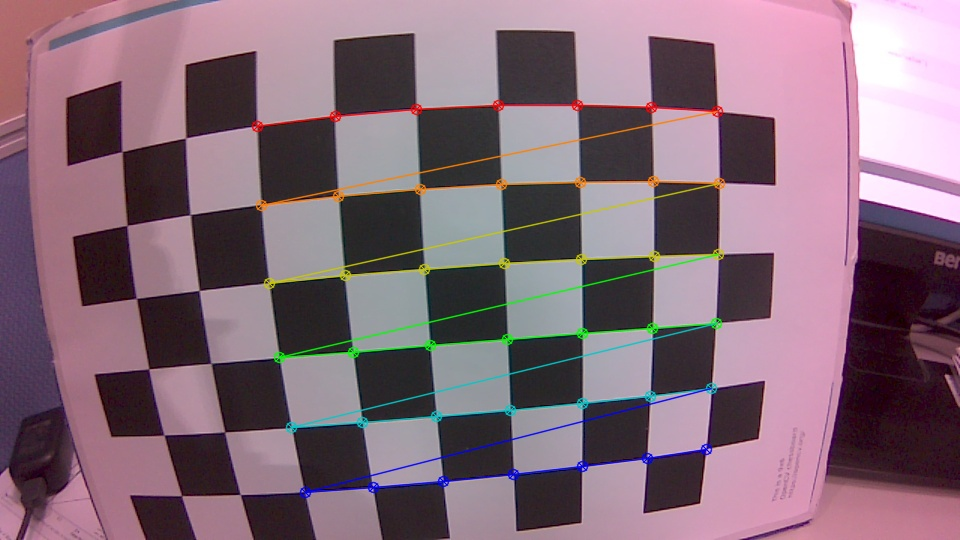

0066.jpgfound chessboard


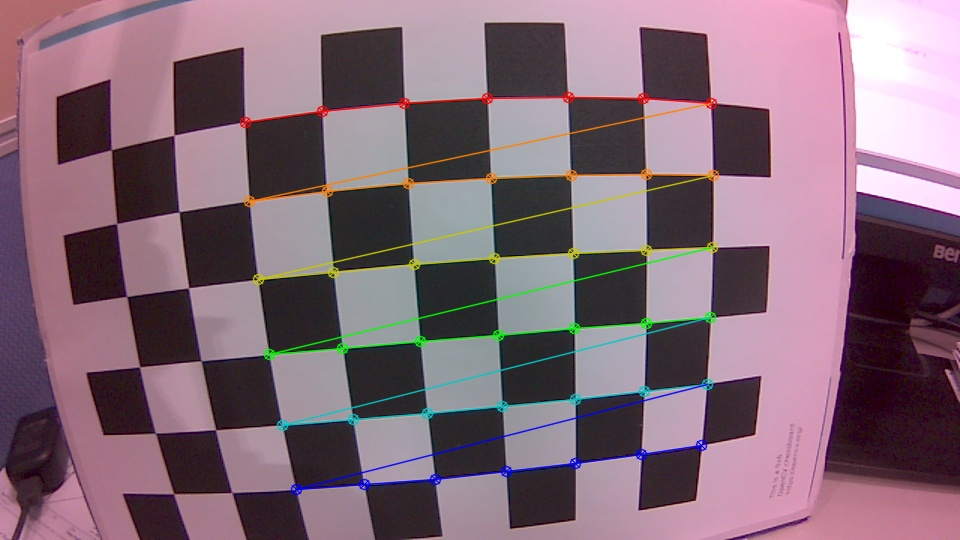

0067.jpgfound chessboard


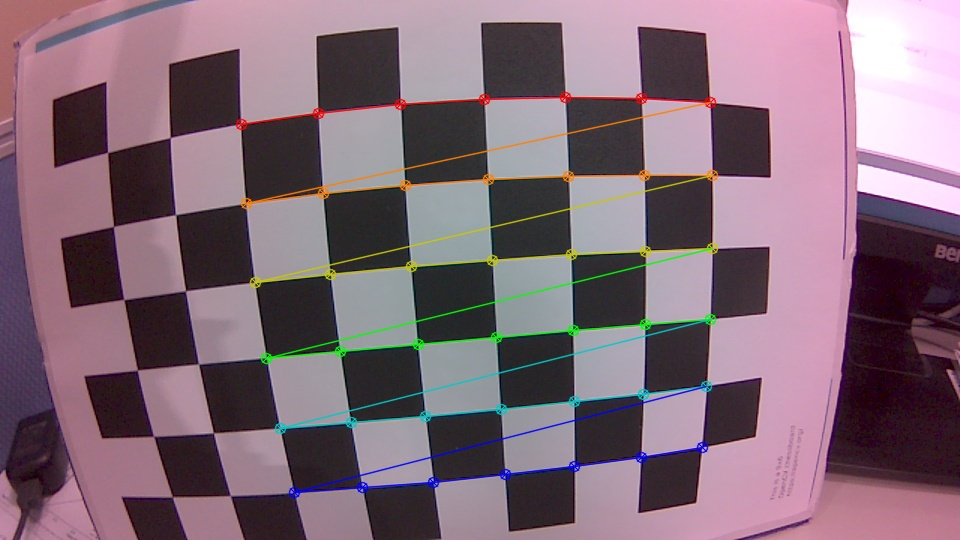

0068.jpgfound chessboard


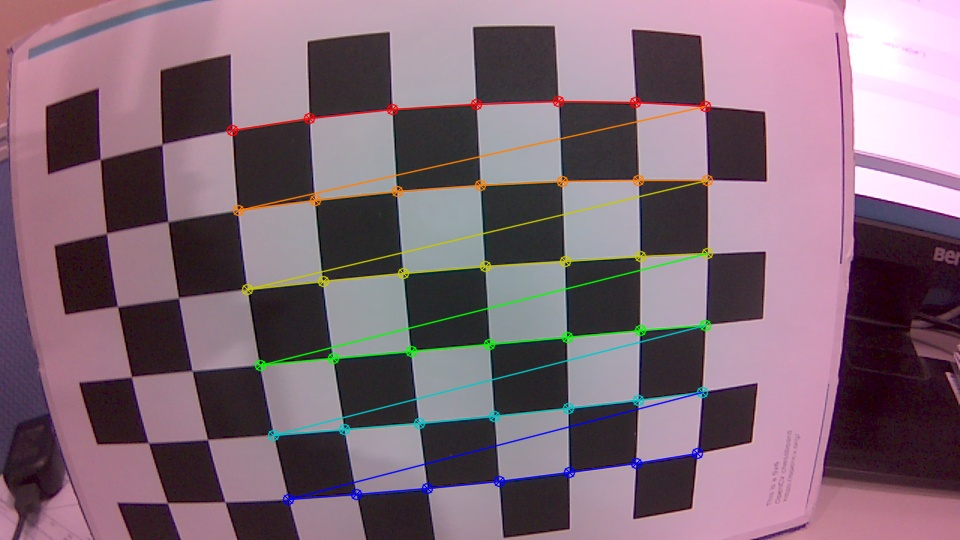

0164.jpgfound chessboard


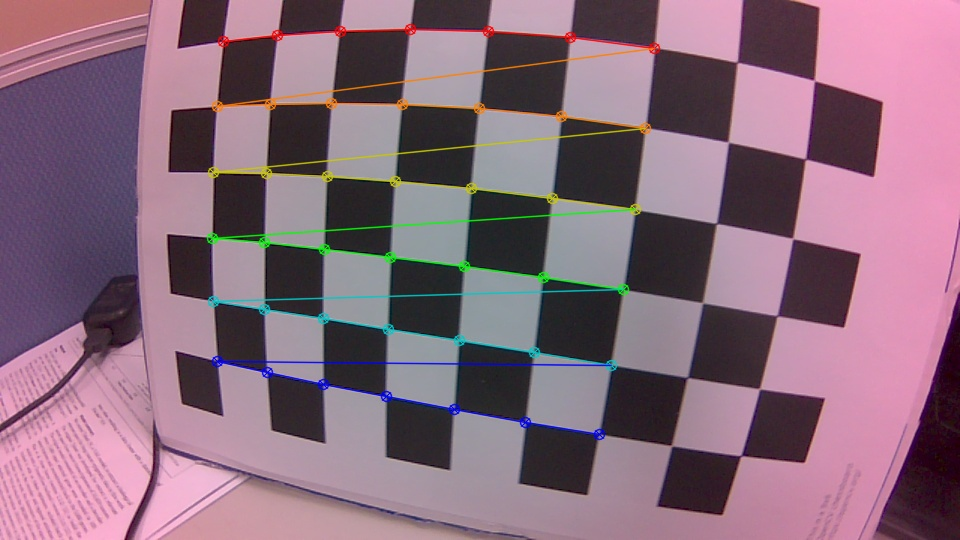

0321.jpgfound chessboard


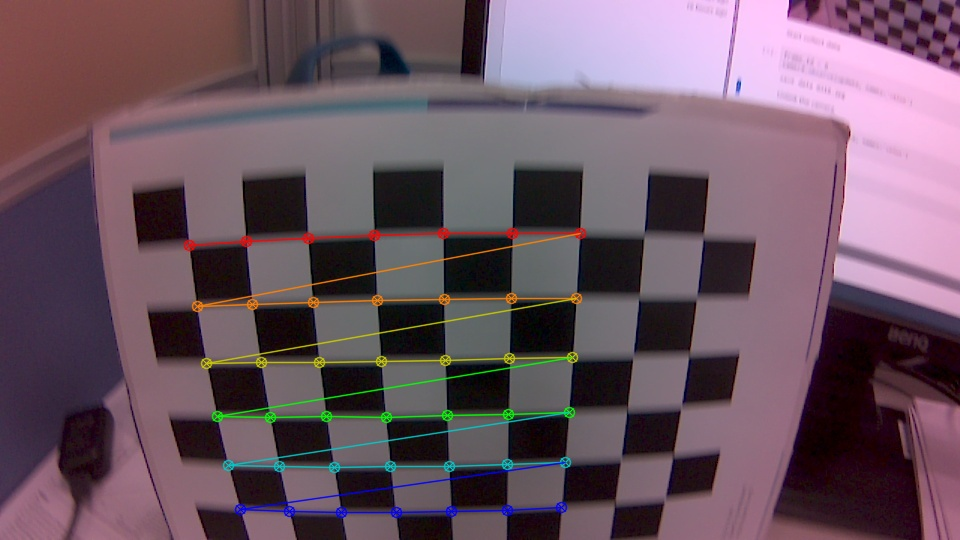

0349.jpgfound chessboard


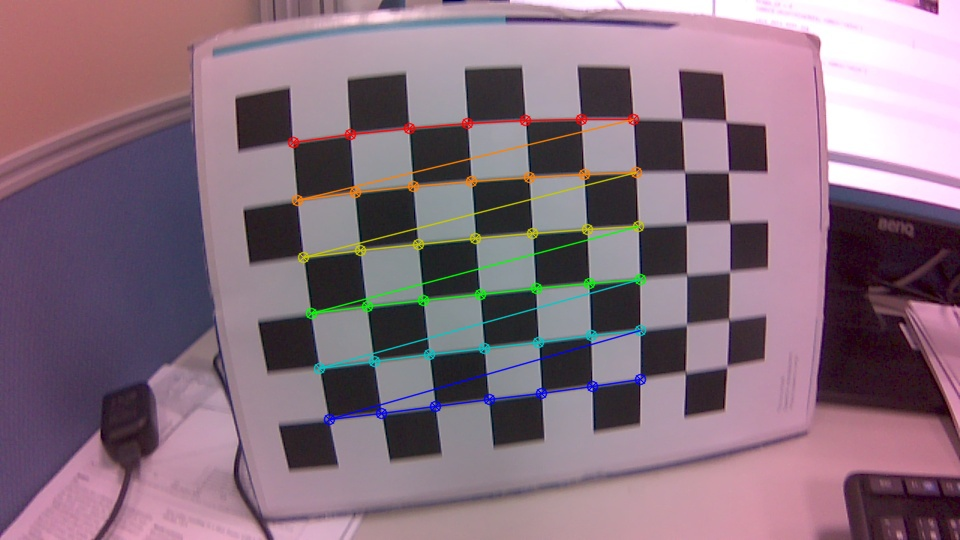

0397.jpgfound chessboard


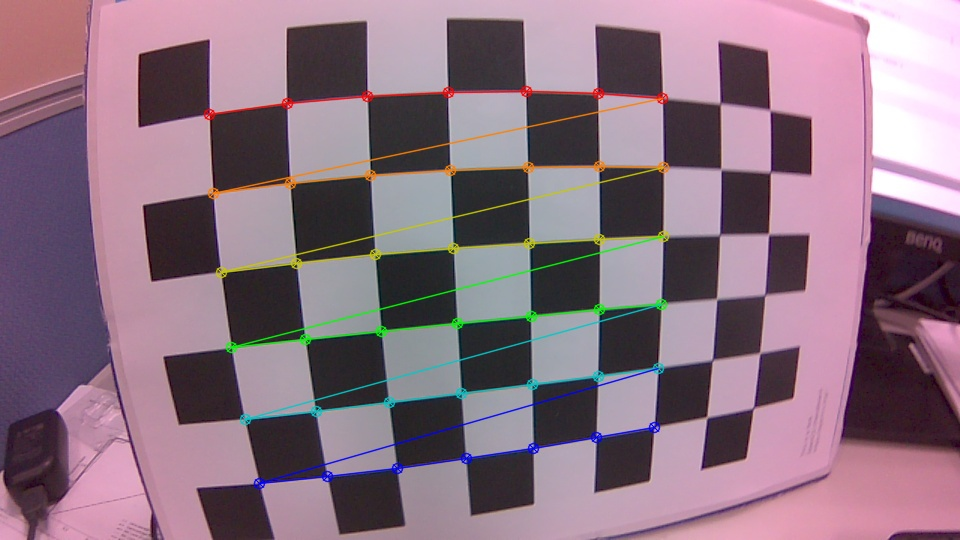

Finished !!


In [4]:
for fname in images:
    if fname.split(".")[-1] != "jpg":
        continue
    print("\r" + fname, end="")
    img = cv2.imread("Images/" + fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        print("found chessboard")
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img_draw = cv2.drawChessboardCorners(img.copy(), (7,6), corners2,ret)
        show_image(img_draw)
        cv2.imwrite(cali_folder + fname, img)
print("\rFinished !!")